# Assignment 3 - Aakanksha Dutta

**1. Use the hw3 data.csv file posted on the website for the following questions. The file contains the PE
ratios and Returns for the Industrial and Financial Sectors.**

**(a) Perform a fisher transform on each of the P/E rartios where the transformation window size for
Health is 756 observations and 1764 observations for the Industrial Sector.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('hw3_data.csv', parse_dates = True, index_col = 0)
data

,Health_PE,HealthSector_Returns,Industrial_PE,IndustrialSector_Returns
Date,,,,
1991-04-08,22.0549,-0.014480,15.4770,-0.016236
1991-04-09,21.7379,-0.003043,15.2208,-0.008287
1991-04-10,21.6718,0.014624,15.2860,0.019911
1991-04-11,21.9911,0.005691,15.4244,-0.001905
1991-04-12,22.1166,0.003776,15.4863,0.002857
...,...,...,...,...
2024-01-26,19.8396,0.006819,21.2431,0.003013
2024-01-29,19.9753,0.002470,21.3780,0.011887
2024-01-30,20.0247,-0.001112,21.3879,-0.012228


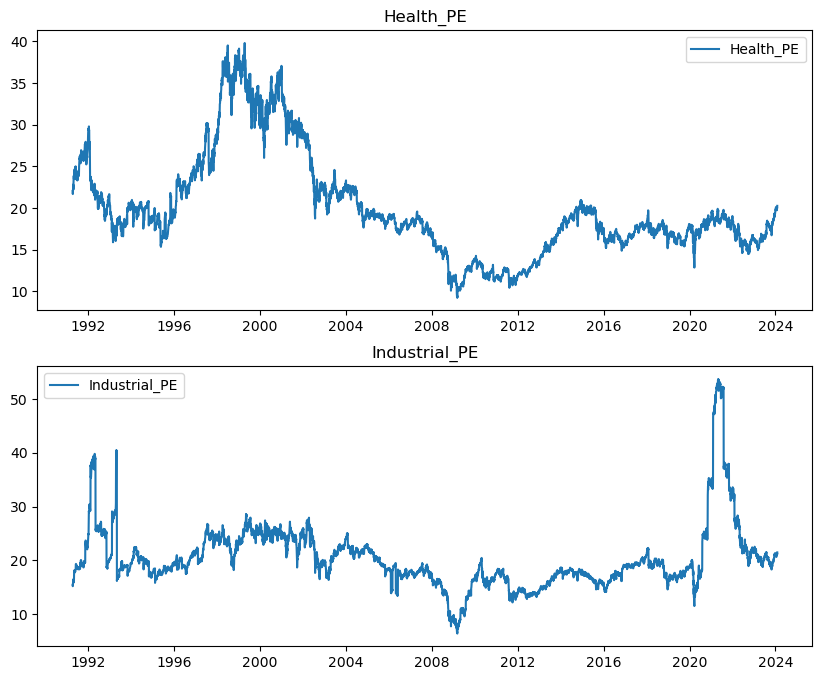

In [7]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the PE columns in separate graphs
axes[0].plot(data['Health_PE'], label='Health_PE')
axes[0].set_title('Health_PE')
axes[0].legend()

axes[1].plot(data['Industrial_PE'], label='Industrial_PE')
axes[1].set_title('Industrial_PE')
axes[1].legend()

# Show the plot
plt.show()

### Health Sector Fisher Transformation

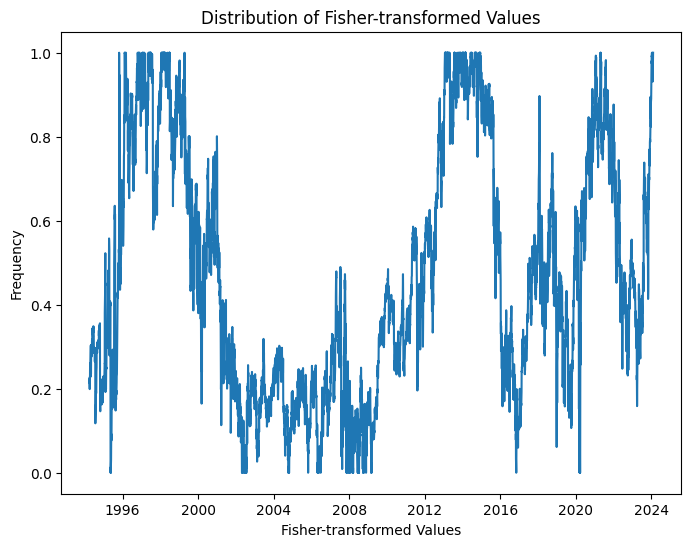

In [4]:
# Step 1: Compute rolling minimum and maximum values
rolling_window = 756  # Assuming this is the window size you want to use
data['roll_min'] = data['Health_PE'].rolling(window=rolling_window).min()
data['roll_max'] = data['Health_PE'].rolling(window=rolling_window).max()

# Step 2: Calculate Fisher transformation
data['fisher'] = (data['Health_PE'] - data['roll_min']) / (data['roll_max'] - data['roll_min'])

# Step 3: Analyze distribution and determine u1 and l1
# You could plot the distribution of the Fisher-transformed values and visually inspect it
# Then, choose u1 and l1 based on the characteristics of the distribution

plt.figure(figsize=(8, 6))
plt.plot(data['fisher'])
plt.title('Distribution of Fisher-transformed Values')
plt.xlabel('Fisher-transformed Values')
plt.ylabel('Frequency')
plt.show()


In [5]:
data

,Health_PE,HealthSector_Returns,Industrial_PE,IndustrialSector_Returns,roll_min,roll_max,fisher
Date,,,,,,,
1991-04-08,22.0549,-0.014480,15.4770,-0.016236,NaN,NaN,NaN
1991-04-09,21.7379,-0.003043,15.2208,-0.008287,NaN,NaN,NaN
1991-04-10,21.6718,0.014624,15.2860,0.019911,NaN,NaN,NaN
1991-04-11,21.9911,0.005691,15.4244,-0.001905,NaN,NaN,NaN
1991-04-12,22.1166,0.003776,15.4863,0.002857,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-01-26,19.8396,0.006819,21.2431,0.003013,14.4757,20.1108,0.951873
2024-01-29,19.9753,0.002470,21.3780,0.011887,14.4757,20.1108,0.975954
2024-01-30,20.0247,-0.001112,21.3879,-0.012228,14.4757,20.1108,0.984721


### Health Sector Sharpe Ratio (using hyperparameters from fisher)

In [6]:
u1 = 0.8
l1 = 0.4
#def calculate_returns(data, fundamental): #fundamental is the PE for the specific industry
#def calculate_rets(data, h, u1, l1, fundamental):
df = data.copy()
df = df.drop(['Industrial_PE','IndustrialSector_Returns'], axis = 1)
# represents the position signal based on certain conditions

df['pos1'] = np.NaN
df.loc[df.loc[(df.fisher.shift() < u1) & (df.fisher > u1)].index, 'pos1'] = -1
df.loc[df.loc[(df.fisher.shift() > l1) & (df.fisher < l1)].index, 'pos1'] = 1
    #It fills the NaN values in the pos1 column using forward fill (ffill())
    #meaning it propagates the last valid observation forward
df['pos1'] = df['pos1'].ffill()
    
df['signal'] = df['pos1'].ffill()

    # Calculate strategy returns
df["strat returns"] = (df["signal"].shift() * df['HealthSector_Returns'])
df["strat returns"] = df["strat returns"].fillna(0)
df["cumulative_returns"] = np.exp(df['strat returns'].cumsum()) - 1

    # Calculate Sharpe ratio
returns = df["strat returns"]
sharpe_ratio = np.mean(returns) / np.std(returns)*100
    # Multiply by 100 to scale heatmap
    #return sharpe_ratio
print('sharpe ratio: ', sharpe_ratio)

sharpe ratio:  0.16183234998304813


In [7]:
df

,Health_PE,HealthSector_Returns,roll_min,roll_max,fisher,pos1,signal,strat returns,cumulative_returns
Date,,,,,,,,,
1991-04-08,22.0549,-0.014480,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1991-04-09,21.7379,-0.003043,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1991-04-10,21.6718,0.014624,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1991-04-11,21.9911,0.005691,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1991-04-12,22.1166,0.003776,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2024-01-26,19.8396,0.006819,14.4757,20.1108,0.951873,-1.0,-1.0,-0.006819,0.176516
2024-01-29,19.9753,0.002470,14.4757,20.1108,0.975954,-1.0,-1.0,-0.002470,0.173613
2024-01-30,20.0247,-0.001112,14.4757,20.1108,0.984721,-1.0,-1.0,0.001112,0.174919


### Industrial Sector Fisher Transformation

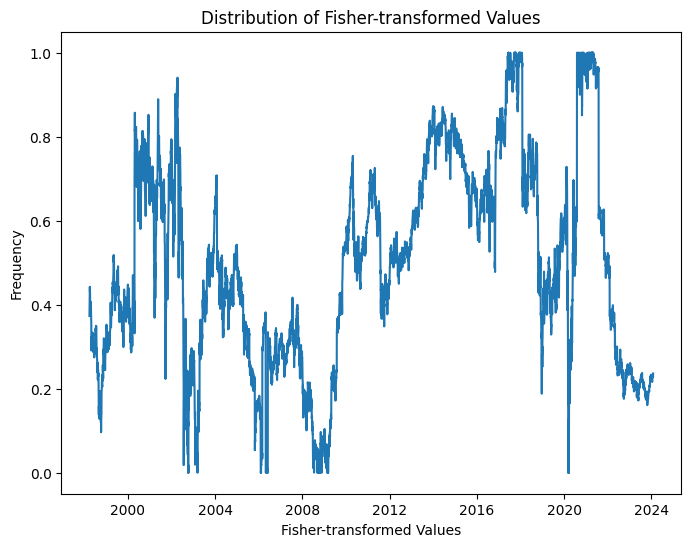

In [8]:
# Step 1: Compute rolling minimum and maximum values
window = 1764  # Assuming this is the window size you want to use
data['Iroll_min'] = data['Industrial_PE'].rolling(window=window).min()
data['Iroll_max'] = data['Industrial_PE'].rolling(window=window).max()

# Step 2: Calculate Fisher transformation
data['Ifisher'] = (data['Industrial_PE'] - data['Iroll_min']) / (data['Iroll_max'] - data['Iroll_min'])

# Step 3: Analyze distribution and determine u1 and l1
# You can use descriptive statistics or visualizations to determine appropriate thresholds
# For example, you could plot the distribution of the Fisher-transformed values and visually inspect it
# Then, choose u1 and l1 based on the characteristics of the distribution

plt.figure(figsize=(8, 6))
plt.plot(data['Ifisher'])
plt.title('Distribution of Fisher-transformed Values')
plt.xlabel('Fisher-transformed Values')
plt.ylabel('Frequency')
plt.show()


In [9]:
data

,Health_PE,HealthSector_Returns,Industrial_PE,IndustrialSector_Returns,roll_min,roll_max,fisher,Iroll_min,Iroll_max,Ifisher
Date,,,,,,,,,,
1991-04-08,22.0549,-0.014480,15.4770,-0.016236,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-09,21.7379,-0.003043,15.2208,-0.008287,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-10,21.6718,0.014624,15.2860,0.019911,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-11,21.9911,0.005691,15.4244,-0.001905,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-12,22.1166,0.003776,15.4863,0.002857,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-26,19.8396,0.006819,21.2431,0.003013,14.4757,20.1108,0.951873,11.5304,53.7319,0.230151
2024-01-29,19.9753,0.002470,21.3780,0.011887,14.4757,20.1108,0.975954,11.5304,53.7319,0.233347
2024-01-30,20.0247,-0.001112,21.3879,-0.012228,14.4757,20.1108,0.984721,11.5304,53.7319,0.233582


### Industrial Sector Sharpe Ratio (using hyperparameters from fisher)

In [10]:
u1 = 0.6
l1 = 0.4

#def calculate_returns(data, fundamental): #fundamental is the PE for the specific industry
#def calculate_returns(data, h, u1, l1, fundamental):
data_copy = data.copy()
data_copy = data_copy.drop(['Health_PE','HealthSector_Returns','roll_min','roll_max','fisher'], axis = 1)
# represents the position signal based on certain conditions

data_copy['Ipos1'] = np.NaN
data_copy.loc[data_copy.loc[(data_copy.Ifisher.shift() < u1) & (data_copy.Ifisher > u1)].index, 'Ipos1'] = -1
data_copy.loc[data_copy.loc[(data_copy.Ifisher.shift() > l1) & (data_copy.Ifisher < l1)].index, 'Ipos1'] = 1
    
    #It fills the NaN values in the pos1 column using forward fill (ffill())
    #meaning it propagates the last valid observation forward
data_copy['Ipos1'] = data_copy['Ipos1'].ffill()
    
data_copy['Isignal'] = data_copy['Ipos1'].ffill()

    # Calculate strategy returns
data_copy["Istrat returns"] = (data_copy["Isignal"].shift() * data_copy['IndustrialSector_Returns'])
data_copy["Istrat returns"] = data_copy["Istrat returns"].fillna(0)
data_copy["Icumulative_returns"] = np.exp(data_copy['Istrat returns'].cumsum()) - 1

    # Calculate Sharpe ratio
returns = data_copy["Istrat returns"]
sharpe_ratio = np.mean(returns) / np.std(returns)*100
    # Multiply by 100 to scale heatmap
    #return sharpe_ratio
print('sharpe ratio: ', sharpe_ratio)

sharpe ratio:  -0.42716704169866876


In [11]:
data_copy

,Industrial_PE,IndustrialSector_Returns,Iroll_min,Iroll_max,Ifisher,Ipos1,Isignal,Istrat returns,Icumulative_returns
Date,,,,,,,,,
1991-04-08,15.4770,-0.016236,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1991-04-09,15.2208,-0.008287,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1991-04-10,15.2860,0.019911,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1991-04-11,15.4244,-0.001905,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1991-04-12,15.4863,0.002857,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2024-01-26,21.2431,0.003013,11.5304,53.7319,0.230151,1.0,1.0,0.003013,-0.446401
2024-01-29,21.3780,0.011887,11.5304,53.7319,0.233347,1.0,1.0,0.011887,-0.439781
2024-01-30,21.3879,-0.012228,11.5304,53.7319,0.233582,1.0,1.0,-0.012228,-0.446590


**(b) Write python code that will implement a trading strategy that will enter a short position when the fisher transformed PE of a sector crosses below some threshold and go long when we crosses above an upper threshold. Once you enter a position, you will only exit when you receive a signal in the opposite direction. (Note: Neither the lecture or the exercise did exactly this, you must make changes)**

#### Health Sector Strategy:
- When the fisher value crosses above the upper threshold (0.8), a sell signal is generated (exit position)
- Conversely, when the fisher value crosses below the lower threshold (0.4), a buy signal is generated (entry position)

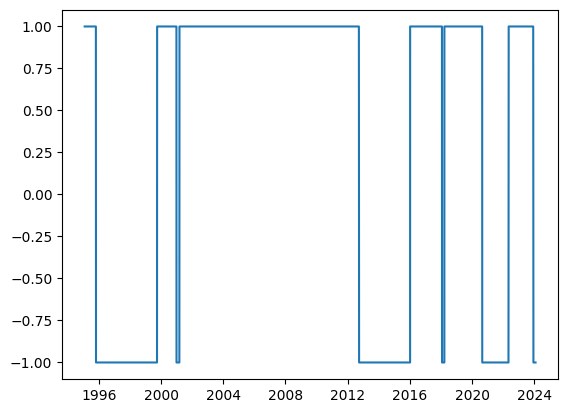

In [12]:
plt.plot(df['pos1'])

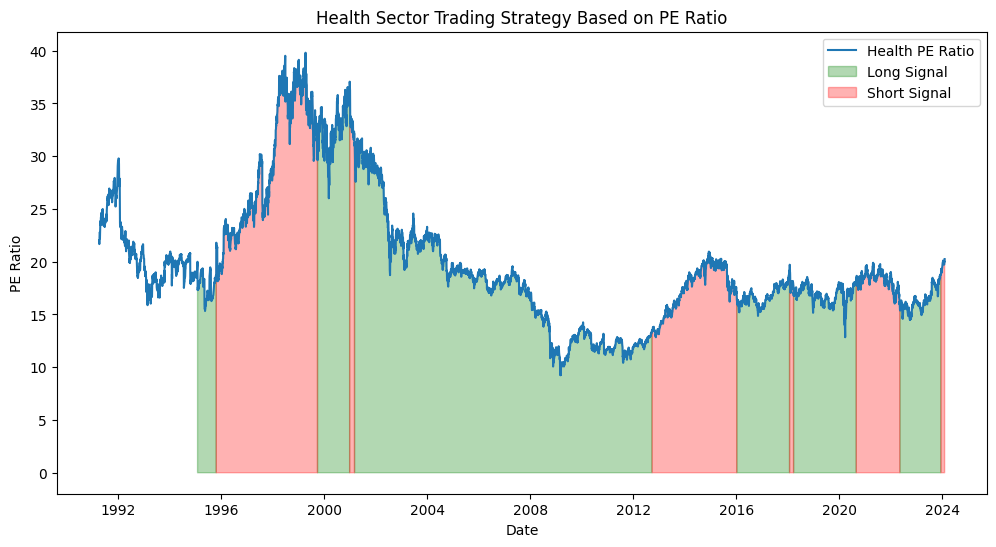

In [13]:
# Plot the trading strategy
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Health_PE'], label='Health PE Ratio')
plt.fill_between(df.index, df['Health_PE'], where=(df['pos1'] == 1), alpha=0.3, color='green', label='Long Signal')
plt.fill_between(df.index, df['Health_PE'], where=(df['pos1'] == -1), alpha=0.3, color='red', label='Short Signal')
plt.title('Health Sector Trading Strategy Based on PE Ratio')
plt.xlabel('Date')
plt.ylabel('PE Ratio')
plt.legend()
plt.show()

In [ ]:
# Save the image as JPEG
img.save('my_plot.jpg')

#### Industrial Sector Strategy:
- When the fisher value crosses above the upper threshold (0.6), a sell signal is generated (exit position)
- Conversely, when the fisher value crosses below the lower threshold (0.4), a buy signal is generated (entry position)

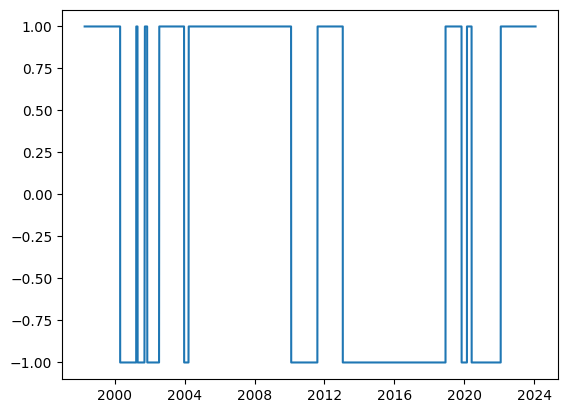

In [14]:
plt.plot(data_copy['Ipos1'])

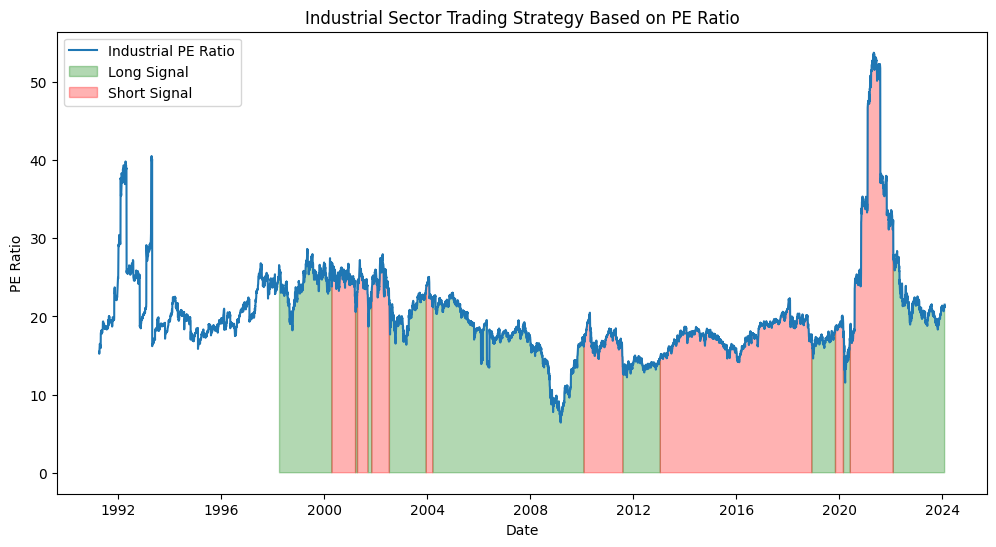

In [15]:
# Plot the trading strategy
plt.figure(figsize=(12, 6))
plt.plot(data_copy.index, data_copy['Industrial_PE'], label='Industrial PE Ratio')
plt.fill_between(data_copy.index, data_copy['Industrial_PE'], where=(data_copy['Ipos1'] == 1), alpha=0.3, color='green', label='Long Signal')
plt.fill_between(data_copy.index, data_copy['Industrial_PE'], where=(data_copy['Ipos1'] == -1), alpha=0.3, color='red', label='Short Signal')
plt.title('Industrial Sector Trading Strategy Based on PE Ratio')
plt.xlabel('Date')
plt.ylabel('PE Ratio')
plt.legend()
plt.show()

**(c) Test at least 400 different combinations of valid (Upper threshold greater than or equal to lower
threshold) hyperparameters for your boundaries for each fisher transformed series of PEs. Use the
geometric mean of returns as your metric for the success of each outcome. Note that we define the
geometric returns as:**
$$GM = nY i=1 (1 + Ri) ! 1 n − 1$$

Where:
- GM is the geometric mean of the returns,
- n is the number of periods (e.g., days, months, years),
- Ri is the simple return for period i,
- Q denotes the product of the terms that follow it,
- 1 + Ri represents the total return (i.e., 1 plus the simple return) for each period

### Health Sector (Trading strategy & Geometric Mean)

In [54]:
from scipy.stats import gmean

# Function to calculate the performance metric
def calculate_performance(returns):
    return gmean(1 + returns) - 1

# Function to implement the trading strategy
def trading_strategy(df, u1, l1):
    df2 = df.copy()
    df2['pos1'] = np.NaN
    df2.loc[(df2['fisher'].shift() < u1) & (df2['fisher'] > u1), 'pos1'] = -1
    df2.loc[(df2['fisher'].shift() > l1) & (df2['fisher'] < l1), 'pos1'] = 1
    df2['pos1'] = df2['pos1'].ffill()
    df2['signal'] = df2['pos1'].ffill()
    df2["strat returns"] = (df2["signal"].shift() * df2['HealthSector_Returns'])
    df2["strat returns"] = df2["strat returns"].fillna(0)
    df2["cumulative_returns"] = np.exp(df2['strat returns'].cumsum()) - 1
    returns = df2["strat returns"]
    performance = calculate_performance(returns)
    return performance
    
# Function to test the trading strategy using different combinations of hyperparameters
def test_strategy(df, u1, l1):
    return trading_strategy(df, u1, l1)

# Test the trading strategy using 400 different combinations of valid hyperparameters
results = []
for _ in range(400):
    u1 = np.random.uniform(0.4, 0.8)
    l1 = np.random.uniform(0, u1)
    performance = test_strategy(df, u1, l1)
    results.append({'u1': u1, 'l1': l1, 'performance': performance})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print the average performance metric
print('Average Performance Metric(Gmean):', np.mean(results_df['performance']))


Average Performance Metric(Gmean): -8.093554855057749e-05


In [55]:
results_df.sort_values(by='performance', ascending=False)

,u1,l1,performance
77,0.785313,0.766620,0.000104
281,0.574430,0.511693,0.000084
218,0.570474,0.509457,0.000072
338,0.558186,0.536761,0.000068
249,0.571522,0.474664,0.000063
...,...,...,...
49,0.421837,0.078247,-0.000314
127,0.405498,0.097129,-0.000315
269,0.403580,0.071068,-0.000317
181,0.411525,0.027428,-0.000318


### Industrial Sector (Trading strategy & Geometric Mean)

In [18]:

# Function to implement the trading strategy
def trading_strategy(data_copy, u1, l1):
    df3 = data_copy.copy()
    df3['Ipos1'] = np.NaN
    df3.loc[(df3['Ifisher'].shift() < u1) & (df3['Ifisher'] > u1), 'Ipos1'] = -1
    df3.loc[(df3['Ifisher'].shift() > l1) & (df3['Ifisher'] < l1), 'Ipos1'] = 1
    df3['Ipos1'] = df3['Ipos1'].ffill()
    df3['Isignal'] = df3['Ipos1'].ffill()
    df3["Istrat returns"] = (df3["Isignal"].shift() * df3['IndustrialSector_Returns'])
    df3["Istrat returns"] = df3["Istrat returns"].fillna(0)
    df3["Icumulative_returns"] = np.exp(df3['Istrat returns'].cumsum()) - 1
    returns = df3["Istrat returns"]
    performance = calculate_performance(returns)
    return performance

# Function to test the trading strategy using different combinations of hyperparameters
def test_strategy(data_copy, u1, l1):
    return trading_strategy(data_copy, u1, l1)

# Test the trading strategy using 400 different combinations of valid hyperparameters
results = []
for _ in range(400):
    u1 = np.random.uniform(0.4, 0.6)
    l1 = np.random.uniform(0, u1)
    performance = test_strategy(data_copy, u1, l1)
    results.append({'u1': u1, 'l1': l1, 'performance': performance})

# Convert results to DataFrame
results_df2 = pd.DataFrame(results)

# Print the average performance metric
print('Average Performance Metric(Gmean):', np.mean(results_df2['performance']))


Average Performance Metric(Gmean): -0.0002240347448547153


In [19]:
results_df2.sort_values(by='performance', ascending=False)

,u1,l1,performance
124,0.585673,0.353660,-0.000082
228,0.416760,0.242243,-0.000118
69,0.415270,0.196679,-0.000122
75,0.553311,0.355740,-0.000123
27,0.408445,0.188171,-0.000123
...,...,...,...
111,0.462758,0.041427,-0.000340
379,0.425396,0.025739,-0.000340
291,0.423528,0.049993,-0.000340
212,0.435320,0.058261,-0.000343


**2. (a) Create two properly labelled heat maps (with a clear distinction between the values of the heat
map, scaling may be required) for your tested hyper parameter values in the industrial and health
sectors.**

C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


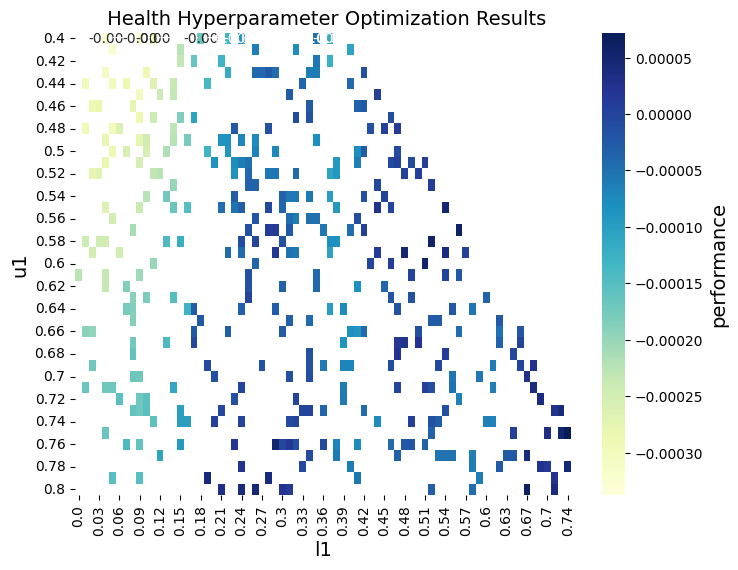

In [20]:
# Define a function to create a heatmap for a fixed 'h' value
def heatmap(x, y, metric, data, title=''):
    # Create a DataFrame with the selected columns
    df1 = data[[x, y, metric]]
    
    # Round the 'z' and 'k' columns to two decimal places using .loc[]
    df1.loc[:, 'u1'] = df1['u1'].round(2)
    df1.loc[:, 'l1'] = df1['l1'].round(2)
    
    # Group by the combinations of x and y, calculate the mean of the metric
    heat = df1.groupby([x, y]).mean()[metric]
    
    # Reshape the data to form a grid
    heat = heat.unstack()
    
    # make plot
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(heat, annot=True, fmt=".2f", cmap="YlGnBu")
    ax.set_title(title,size = 14)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xlabel(y, size = 14)
    ax.set_ylabel(x, size = 14)
    ax.collections[0].colorbar.set_label(metric, size = 14)
    plt.show()

# Call the heatmap function with the appropriate parameters
heatmap('u1', 'l1', 'performance', results_df, title=' Health Hyperparameter Optimization Results')


C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


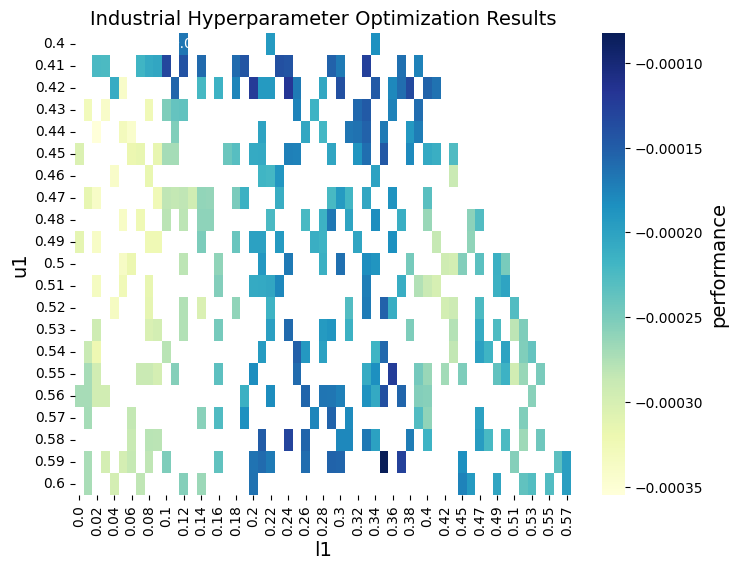

In [21]:
heatmap('u1', 'l1', 'performance', results_df2, title='Industrial Hyperparameter Optimization Results')



**(b) What do the heatmaps tell you about the hyperparameters that are best for each sector? Is there
any similarity between the two?**

**Health Sector:** The best performing hyperparameters for the health sector are around u1 = 0.56-0.58 and l1 = 0.44-0.55, with corresponding positive performances ranging from 0.000062 to 0.000077. There is a slight variation in the optimal hyperparameters, indicating that the strategy's performance is sensitive to changes in these parameters.

**Industrial Sector:** The best performing hyperparameters are also around u1 = 0.56-0.58, but the corresponding l1 values range from 0.24-0.38. The performance values for the industrial sector are negative, indicating that the strategy may not be profitable with these hyperparameters.

**Similarities:** There is a similarity in the optimal range of u1 values for both sectors, suggesting that similar thresholds for the fisher signal may be effective across sectors. However, there is a notable difference in the corresponding l1 values, indicating that the sensitivity to the lower threshold varies between the two sectors.


**(c) Based on what you learned from the heatmaps, pick a pair of hyperparameters for the health and
industrial sector strategies and visualize the equity curve the produce for each.**


Text(0.5, 1.0, 'Health Portfolio Equity Curve')

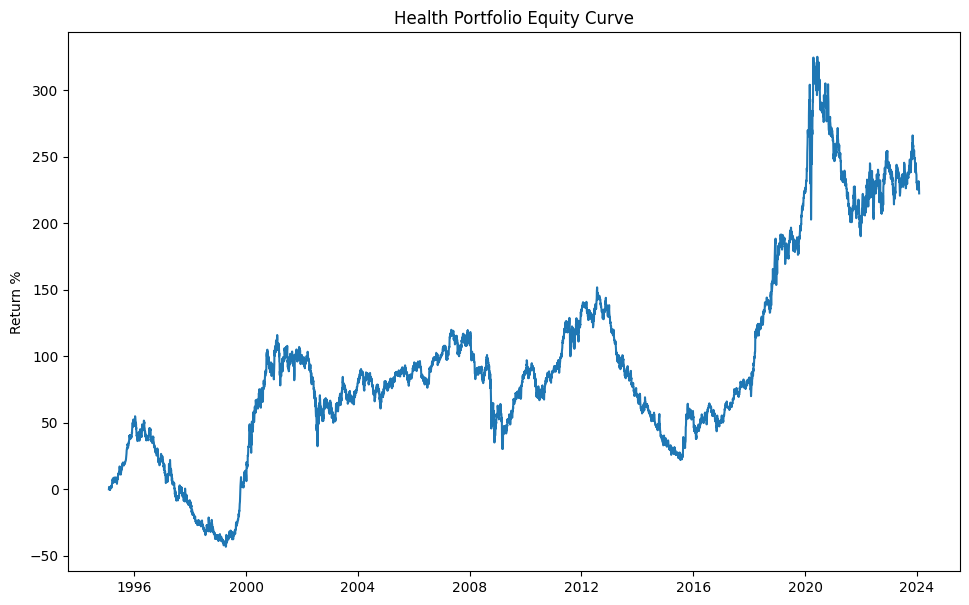

In [22]:
def calculate_returns(df, u1, l1):
    data_copy = df.copy()
    data_copy['pos1'] = np.NaN
    data_copy.loc[(data_copy['fisher'].shift() < u1) & (data_copy['fisher'] > u1), 'pos1'] = -1
    data_copy.loc[(data_copy['fisher'].shift() > l1) & (data_copy['fisher'] < l1), 'pos1'] = 1
    data_copy['pos1'] = data_copy['pos1'].ffill()
    data_copy['signal'] = data_copy['pos1'].ffill()
    data_copy["strat returns"] = (data_copy["signal"].shift() * data_copy['HealthSector_Returns'])
    data_copy["strat returns"] = data_copy["strat returns"].fillna(0)
    data_copy["cumulative_returns"] = np.exp(data_copy['strat returns'].cumsum()) - 1
    return data_copy.dropna()

# fill in some good candidate values
health = calculate_returns(df,0.58 ,0.50)

plt.figure( figsize = (11.5,7))
plt.plot(health.cumulative_returns*100)
plt.ylabel('Return %')
plt.title('Health Portfolio Equity Curve') 

Text(0.5, 1.0, 'Industrial Portfolio Equity Curve')

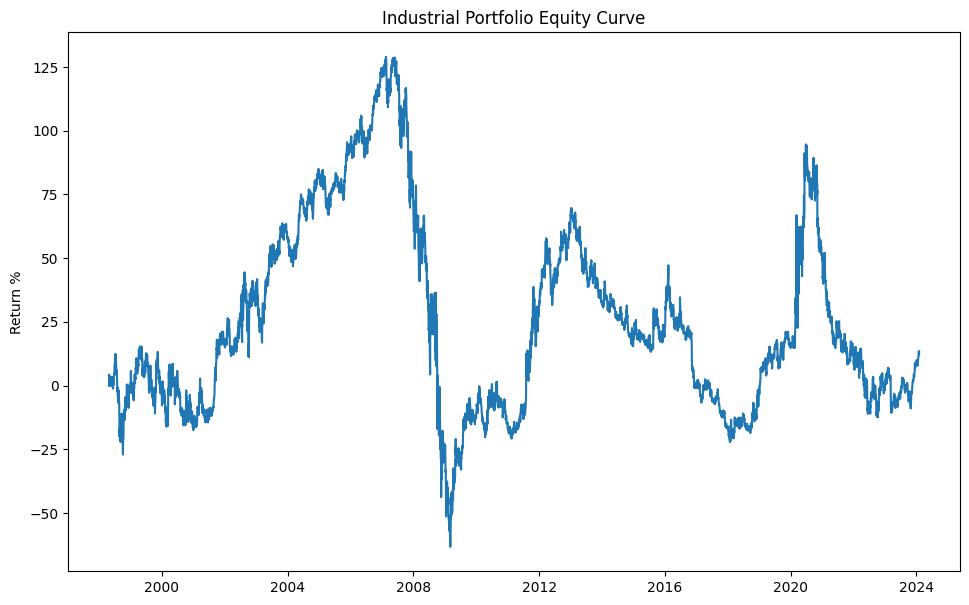

In [23]:
def calculate_returns(data_copy, u1, l1):
    df2 = data_copy.copy()
    df2['Ipos1'] = np.NaN
    df2.loc[(df2['Ifisher'].shift() < u1) & (df2['Ifisher'] > u1), 'Ipos1'] = -1
    df2.loc[(df2['Ifisher'].shift() > l1) & (df2['Ifisher'] < l1), 'Ipos1'] = 1
    df2['Ipos1'] = df2['Ipos1'].ffill()
    df2['Isignal'] = df2['Ipos1'].ffill()
    df2["Istrat returns"] = (df2["Isignal"].shift() * df2['IndustrialSector_Returns'])
    df2["Istrat returns"] = df2["Istrat returns"].fillna(0)
    df2["Icumulative_returns"] = np.exp(df2['Istrat returns'].cumsum()) - 1
    return df2.dropna()

# fill in some good candidate values
industrial = calculate_returns(data_copy,0.58 ,0.36)

plt.figure( figsize = (11.5,7))
plt.plot(industrial.Icumulative_returns*100)
plt.ylabel('Return %')
plt.title('Industrial Portfolio Equity Curve')
    

**3. Portfolio Creation
(a) Use the outcomes you generated in 2c to create an equally weighted portfolio.**


In [24]:
# Step 1: Construct a DataFrame with asset returns and strategy signals
portfolio_df = pd.DataFrame({
    'Date': health.index,  # Assuming the index represents dates
    'Health_Returns': health['HealthSector_Returns'],
    'Health_Signal': health['signal'],
    'Industrial_Returns': industrial['IndustrialSector_Returns'],
    'Industrial_Signal': industrial['Isignal']
})

# Step 2: Multiply signals with returns of respective assets
portfolio_df['Health_Strategy_Returns'] = portfolio_df['Health_Signal'] * portfolio_df['Health_Returns']
portfolio_df['Industrial_Strategy_Returns'] = portfolio_df['Industrial_Signal'] * portfolio_df['Industrial_Returns']

# Step 3: Calculate weighted strategy returns for each period
# Assuming equal weights (1/2) for each sector
portfolio_df['Weighted_Strategy_Returns'] = 0.5 * (portfolio_df['Health_Strategy_Returns'] + portfolio_df['Industrial_Strategy_Returns'])

# Step 4: Calculate cumulative sum to get profits over the period
portfolio_df['Cumulative_Profits'] = (1 + portfolio_df['Weighted_Strategy_Returns']).cumprod() - 1

# Display the portfolio DataFrame
print(portfolio_df)


                 Date  Health_Returns  Health_Signal  Industrial_Returns  \
Date                                                                       
1995-02-01 1995-02-01       -0.002745            1.0                 NaN   
1995-02-02 1995-02-02        0.005860            1.0                 NaN   
1995-02-03 1995-02-03        0.011898            1.0                 NaN   
1995-02-06 1995-02-06       -0.005416            1.0                 NaN   
1995-02-07 1995-02-07       -0.000562            1.0                 NaN   
...               ...             ...            ...                 ...   
2024-01-26 2024-01-26        0.006819           -1.0            0.003013   
2024-01-29 2024-01-29        0.002470           -1.0            0.011887   
2024-01-30 2024-01-30       -0.001112           -1.0           -0.012228   
2024-01-31 2024-01-31        0.012589           -1.0            0.000915   
2024-02-01 2024-02-01        0.001508           -1.0            0.007644   

           

**(b) Show the equity curve of the portfolio from the previous part.**


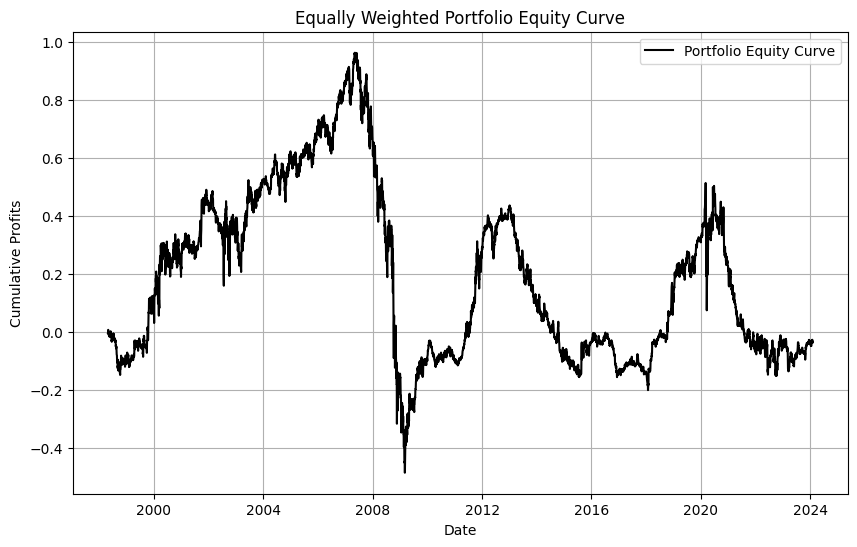

In [25]:
# Plot the equity curve
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df['Date'], portfolio_df['Cumulative_Profits'], color='black', label='Portfolio Equity Curve')
plt.title('Equally Weighted Portfolio Equity Curve')
plt.xlabel('Date')
plt.ylabel('Cumulative Profits')
plt.legend()
plt.grid(True)
plt.show()

**(c) How the equity curve of the portfolio compare to the results of each sector individually? Back up
your answer with two or more of the metrics we have learned in class.**


### Sharpe Ratio Comparison

In [26]:
eq_returns = portfolio_df["Weighted_Strategy_Returns"]
eq_sharpe_ratio = np.mean(eq_returns) / np.std(eq_returns)*100
print(eq_sharpe_ratio)

0.5717974692662917


In [27]:
h_returns = health['strat returns']
h_sharpe_ratio = np.mean(h_returns) / np.std(h_returns)*100
print(h_sharpe_ratio)

1.3711478716160703


In [28]:
I_returns = industrial['Istrat returns']
I_sharpe_ratio = np.mean(I_returns) / np.std(I_returns)*100
print(I_sharpe_ratio)

0.1022892884891797


- The health strategy has the highest Sharpe ratio (1.39), indicating better risk-adjusted returns compared to the industrial strategy (0.10) and the equally weighted portfolio (0.57).
- A higher Sharpe ratio suggests that the health strategy achieved superior returns for each unit of risk taken, making it a more efficient investment option.

### CCROR Comparison

In [29]:
# Calculate the first non-zero index for each sector
health_first_nonzero_index = (health['strat returns']!= 0).idxmax()
industrial_first_nonzero_index = (industrial['Istrat returns']!= 0).idxmax()
portfolio_first_nonzero_index = (portfolio_df['Weighted_Strategy_Returns']!= 0).idxmax()

# Get the iloc of the first non-zero index for each sector
health_first_nonzero_index_loc = health.index.get_loc(health_first_nonzero_index)
industrial_first_nonzero_index_loc = industrial.index.get_loc(industrial_first_nonzero_index)
portfolio_first_nonzero_index_loc = portfolio_df.index.get_loc(portfolio_first_nonzero_index)

# Print the results
print("iloc of the first non-zero index for Health Sector Strategy Returns:", health_first_nonzero_index_loc)
print("iloc of the first non-zero index for Industrial Sector Strategy Returns:", industrial_first_nonzero_index_loc)
print("iloc of the first non-zero index for Equally Weighted Portfolio Strategy Returns:", portfolio_first_nonzero_index_loc)


iloc of the first non-zero index for Health Sector Strategy Returns: 1
iloc of the first non-zero index for Industrial Sector Strategy Returns: 1
iloc of the first non-zero index for Equally Weighted Portfolio Strategy Returns: 0


In [30]:
# Assuming starting position is at 1
change_rets = health['strat returns'].iloc[-1]

n_years = (len(health)/252)
hccror = np.log(change_rets)/n_years*100
hccror

C:\Users\akudu\AppData\Local\Temp\ipykernel_32932\2675666092.py:5: RuntimeWarning: invalid value encountered in log
  hccror = np.log(change_rets)/n_years*100


nan

In [31]:
change_rets2 = industrial['Istrat returns'].iloc[-1] / industrial['Istrat returns'].iloc[1]

n = (len(industrial)/252)
Iccror = np.log(change_rets2)/n*100
Iccror

-0.025503419428666782

In [32]:
# Again assuming starting position at 1
eq_change_rets = portfolio_df["Weighted_Strategy_Returns"].iloc[-1]
eq_n = (len(portfolio_df)/252)
eq_ccror = np.log(eq_change_rets)/eq_n*100
eq_ccror

-19.97374499556211

- The industrial strategy has a negative CCROR (-0.025), indicating that the strategy resulted in a loss after considering the risk.
- The equally weighted portfolio also performed poorly with a significantly negative CCROR (-19.97).
- The health strategy's CCROR is not available (nan), suggesting that the risk-adjusted return could not be computed due to missing data or other factors.

### Annualized Returns Comparison

In [33]:
# Annualized Return
ar_h = ((np.exp(health['strat returns'].cumsum()).iloc[-1]**(252/len(health)))-1)*100
ar_h

4.1249072503996675

In [34]:
# Annualized Return
ar_I = ((np.exp(industrial['Istrat returns'].cumsum()).iloc[-1]**(252/len(industrial)))-1)*100
ar_I

0.4814431085449655

In [35]:
# Annualized Return
eq_ar = ((np.exp(portfolio_df["Weighted_Strategy_Returns"].cumsum()).iloc[-1]**(252/len(portfolio_df)))-1)*100
eq_ar

1.5853647330944964

- The health strategy achieved the highest annualized returns (4.12%), followed by the equally weighted portfolio (1.58%) and the industrial strategy (0.48%).
- Higher annualized returns imply better profitability over the specified time period, indicating the health strategy's superior performance in generating returns.

### Gini Coefficient Comparison

In [36]:
def GINI_COEF(returns):
    # get the number of periods -> will allow us to calculate the areas
    periods = len(returns)
    
    # sort values and sum to calculate the lorenz curve
    LorenzCurve = np.cumsum(returns.sort_values( by = "Returns"))
    # start from 0
    LorenzCurve = pd.concat([pd.DataFrame({ 'Returns': [0]}), LorenzCurve])
    Line = LorenzCurve.copy()
    # Form the line that encompasses A and B
    #Line["Returns"] = np.arange(0,1+1/periods, 1/periods)*max(LorenzCurve["Returns"])
    Line["Returns"] = np.linspace(0, max(LorenzCurve["Returns"]), periods + 1)
    # calculate the area of A+B
    UpArea = 0
    for i in range(1,len(returns)):
        UpArea = UpArea + ((Line.iloc[i,:] - LorenzCurve.iloc[i,:] + Line.iloc[i-1,:] - LorenzCurve.iloc[i-1,:]) / 2)
    # calculate the area of A+B+C
    if min(LorenzCurve["Returns"]) < 0:
        AllArea = (np.abs(min(LorenzCurve["Returns"])) * periods) + ((max(LorenzCurve["Returns"]) * periods)/2)
    else:
        AllArea = ((max(LorenzCurve["Returns"]) * periods)/2)
    gini = UpArea / AllArea
    return(gini.iloc[0])

In [37]:
health

,Health_PE,HealthSector_Returns,roll_min,roll_max,fisher,pos1,signal,strat returns,cumulative_returns
Date,,,,,,,,,
1995-02-01,17.3580,-0.002745,15.8811,23.5185,0.193377,1.0,1.0,0.000000,0.000000
1995-02-02,17.3105,0.005860,15.8811,23.3200,0.192152,1.0,1.0,0.005860,0.005877
1995-02-03,17.4137,0.011898,15.8811,23.3190,0.206053,1.0,1.0,0.011898,0.017916
1995-02-06,17.6155,-0.005416,15.8811,23.3190,0.233184,1.0,1.0,-0.005416,0.012418
1995-02-07,17.5204,-0.000562,15.8811,23.3190,0.220398,1.0,1.0,-0.000562,0.011849
...,...,...,...,...,...,...,...,...,...
2024-01-26,19.8396,0.006819,14.4757,20.1108,0.951873,-1.0,-1.0,-0.006819,2.275734
2024-01-29,19.9753,0.002470,14.4757,20.1108,0.975954,-1.0,-1.0,-0.002470,2.267652
2024-01-30,20.0247,-0.001112,14.4757,20.1108,0.984721,-1.0,-1.0,0.001112,2.271288


In [38]:
returns_g = health[['strat returns']]
returns_g.columns = ['Returns']

In [39]:
GINI_COEF(np.log(returns_g+1))

0.7436515647197118

C:\Users\akudu\AppData\Local\Temp\ipykernel_32932\1523693460.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(health['cumulative_returns'].dropna(), kde=False, bins=30)


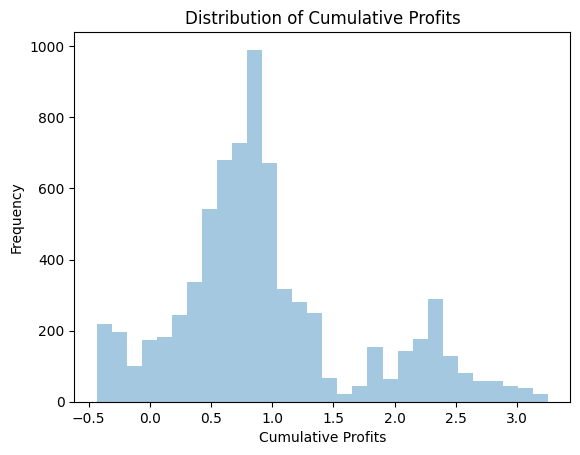

In [40]:
# Plot the distribution of the data
sns.distplot(health['cumulative_returns'].dropna(), kde=False, bins=30)
plt.title('Distribution of Cumulative Profits')
plt.xlabel('Cumulative Profits')
plt.ylabel('Frequency')
plt.show()

In [41]:
industrial

,Industrial_PE,IndustrialSector_Returns,Iroll_min,Iroll_max,Ifisher,Ipos1,Isignal,Istrat returns,Icumulative_returns
Date,,,,,,,,,
1998-04-27,24.4642,0.000032,15.8377,40.5118,0.349618,1.0,1.0,0.000000,0.000000
1998-04-28,23.0167,0.007694,15.8377,40.5118,0.290953,1.0,1.0,0.007694,0.007724
1998-04-29,23.2876,0.019087,15.8377,40.5118,0.301932,1.0,1.0,0.019087,0.027143
1998-04-30,23.7559,0.015350,15.8377,40.5118,0.320911,1.0,1.0,0.015350,0.043031
1998-05-01,23.8307,-0.008499,15.8377,40.5118,0.323943,1.0,1.0,-0.008499,0.034204
...,...,...,...,...,...,...,...,...,...
2024-01-26,21.2431,0.003013,11.5304,53.7319,0.230151,1.0,1.0,0.003013,0.122301
2024-01-29,21.3780,0.011887,11.5304,53.7319,0.233347,1.0,1.0,0.011887,0.135721
2024-01-30,21.3879,-0.012228,11.5304,53.7319,0.233582,1.0,1.0,-0.012228,0.121918


In [42]:
Ireturns_g = industrial[['Istrat returns']]
Ireturns_g.columns = ['Returns']

In [43]:
GINI_COEF(np.log(Ireturns_g+1))

0.7667209446179195

C:\Users\akudu\AppData\Local\Temp\ipykernel_32932\2233999089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(industrial['Icumulative_returns'].dropna(), kde=False, bins=30)


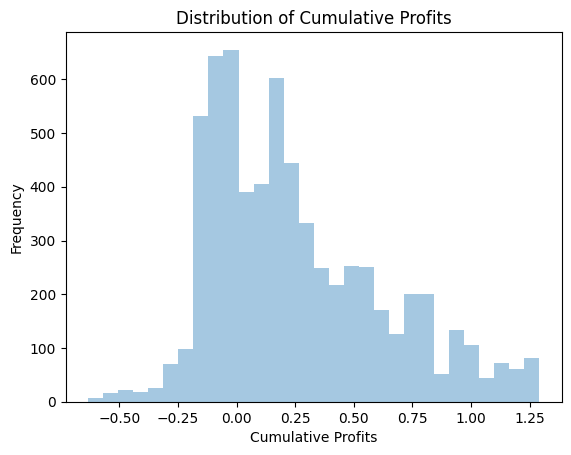

In [44]:
# Plot the distribution of the data
sns.distplot(industrial['Icumulative_returns'].dropna(), kde=False, bins=30)
plt.title('Distribution of Cumulative Profits')
plt.xlabel('Cumulative Profits')
plt.ylabel('Frequency')
plt.show()

In [45]:
def GINI_COEF2(returns):
    # get the number of periods -> will allow us to calculate the areas
    periods = len(returns)
    
    # sort values and sum to calculate the lorenz curve
    LorenzCurve = np.cumsum(returns.sort_values())
    # start from 0
    LorenzCurve = pd.concat([pd.DataFrame({ 'Returns': [0]}), LorenzCurve])
    Line = LorenzCurve.copy()
    # Form the line that encompasses A and B
    #Line["Returns"] = np.arange(0,1+1/periods, 1/periods)*max(LorenzCurve["Returns"])
    Line["Returns"] = np.linspace(0, max(LorenzCurve["Returns"]), periods + 1)
    # calculate the area of A+B
    UpArea = 0
    for i in range(1,len(returns)):
        UpArea = UpArea + ((Line.iloc[i,:] - LorenzCurve.iloc[i,:] + Line.iloc[i-1,:] - LorenzCurve.iloc[i-1,:]) / 2)
    # calculate the area of A+B+C
    if min(LorenzCurve["Returns"]) < 0:
        AllArea = (np.abs(min(LorenzCurve["Returns"])) * periods) + ((max(LorenzCurve["Returns"]) * periods)/2)
    else:
        AllArea = ((max(LorenzCurve["Returns"]) * periods)/2)
    gini = UpArea / AllArea
    return(gini.iloc[0])

In [46]:
eq_returns_g = portfolio_df["Weighted_Strategy_Returns"]
eq_returns_g.columns = ['Returns']
GINI_COEF2(np.log(eq_returns_g+1))

nan

C:\Users\akudu\AppData\Local\Temp\ipykernel_32932\1923452254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(portfolio_df['Cumulative_Profits'].dropna(), kde=False, bins=30)


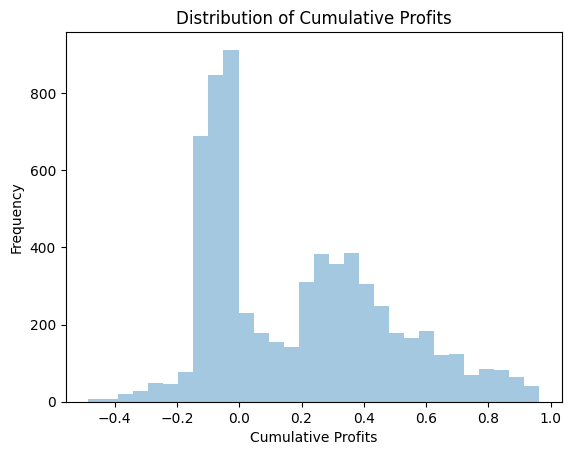

In [47]:
# Plot the distribution of the data
sns.distplot(portfolio_df['Cumulative_Profits'].dropna(), kde=False, bins=30)
plt.title('Distribution of Cumulative Profits')
plt.xlabel('Cumulative Profits')
plt.ylabel('Frequency')
plt.show()

- The Gini coefficient measures the equality of the distribution of returns. A higher Gini coefficient indicates a more unequal distribution of returns.
- Both the health strategy (0.74) and the industrial strategy (0.77) have relatively high Gini coefficients, suggesting uneven distributions of returns.
- However, the equally weighted portfolio has a Gini coefficient of nan, which may indicate missing or inconsistent data for calculating the Gini coefficient.

### CONCLUSION: 
Considering Sharpe Ratios and Annualized Returns, the Health strategy appears to be the best strategy. It not only provides higher returns but also achieves those returns with better risk-adjusted performance, as indicated by the higher Sharpe ratio. It also overperforms the Industrial strategy by a huge margin as seen in the equity curves.

**4. Describe a mechanism that may explain why the principle of contrarian opinion may be observed across many financial markets.**

The principle of contrarian opinion, can be caused due to behavioral biases and herd mentality among investors. When overly optimistic news dominates headlines, it often signals a peak in market sentiment. Many investors would have already bought into the market at this point, which could lead to a market bubble. On the other hand, when sentiment becomes overly negative and headlines proclaim doom or the demise of a particular asset or market, contrarian investors may see this as an opportunity to buy assets at discounted prices. They believe that the prevailing negative sentiment has already been factored into prices, potentially creating an opportunity for prices to rebound as sentiment improves over time. 

One example illustrating this principle is the "Bitcoin is Dead" index, which measures the prevalence of hyper-negative news articles about Bitcoin. Historically, spikes in negative sentiment in the media have coincided with market bottoms for Bitcoin, suggesting that extreme pessimism often accompanies price troughs. 

Overall, the contrarian opinion principle highlights the tendency for market sentiment to swing in the opposite direction of prevailing news sentiment, as investors react to exaggerated optimism or pessimism in the media.

**5. Higher feds funds rates lead to declines in stock price indexes. True or false, explain.**

Dow Jones Market Data recently analyzed the five most recent rate hike cycles to see what history says about stock market returns in these periods. Their analysis illustrates that during these five long-term periods, the three leading stock market indexes only declined during one rate hike cycle. Thus, we cannot say for sure that an increase in the Feds Funds Rate would lead to a decline in stock prices. Also, rate hikes don’t hurt everyone equally. In fact, they can help certain sectors, like financial stocks. If one is in the business of lending money, higher rates mean higher margins. On the other hand, rising rates tend to hurt growth stocks, like tech startups.

However, this statement is also sometimes true since stock prices are affected when the Federal Reserve increases the federal funds rate. The Fed does this to tighten monetary policy to control inflation and cool down an overheating economy. Frequently, when rates rise, equities are challenged because investors can choose to invest in bonds that pay more attractive yields than was previously the case, rather than stocks. Higher rates can put pressure on stock valuations, as corporations may need to generate more attractive earnings to capture investor interest. Another way the interest rate environment affects stocks has to do with companies’ bottom lines. If a debt-issuing company faces higher borrowing costs due to rising rates, it may result in reduced company profits, which can be reflected in lower stock prices.